**Importing and installing**

In [ ]:
pip install pandas


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
data = files.upload()

Saving autoscout24-germany-dataset.csv to autoscout24-germany-dataset.csv


In [ ]:
cars_set = pd.read_csv("autoscout24-germany-dataset.csv")

In [ ]:
cars_set

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46400,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46401,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46402,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021
46403,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990,71.0,2021


**Cleaning, filtering and sorting the data**

In [ ]:
# removing duplicate rows and making a new dataset to work on
cars_set_clean = cars_set.drop_duplicates()
cars_set_clean

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011
...,...,...,...,...,...,...,...,...,...
46394,10,Citroen,C1,Gasoline,Manual,Pre-registered,12340,72.0,2021
46396,99,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12490,71.0,2021
46397,550,Fiat,500,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021
46398,837,Fiat,Panda,Electric/Gasoline,Manual,Demonstration,12805,69.0,2021


In [ ]:
# view of the duplicate rows
dups = cars_set[~cars_set.isin(cars_set_clean)]
dups

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
46400,99.0,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021.0
46401,99.0,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021.0
46402,99.0,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021.0
46403,99.0,Fiat,500,Electric/Gasoline,Manual,Pre-registered,12990.0,71.0,2021.0


In [ ]:
# total number of duplicate rows
cars_set.duplicated().sum()


2140

In [ ]:
# dropping the rows with any NaN values
cars_set_clean = cars_set_clean.dropna()

In [ ]:
# view of rows with NaN values
c = cars_set.isna().any(axis = 1)
cdf = cars_set[c]
cdf

,mileage,make,model,fuel,gear,offerType,price,hp,year
243,93850,Renault,Grand Scenic,Diesel,NaN,Used,7990,110.0,2012
347,52753,Lada,Vesta,Gasoline,NaN,Used,8000,106.0,2017
365,3500,Others,NaN,Electric,Manual,Used,5500,38.0,2018
482,36018,Mitsubishi,Space Star,Gasoline,Manual,Used,6222,NaN,2015
612,46850,Suzuki,Alto,Gasoline,NaN,Used,3999,68.0,2011
...,...,...,...,...,...,...,...,...,...
46114,35,Kia,NaN,Electric/Gasoline,Automatic,Pre-registered,30440,141.0,2021
46120,35,Kia,NaN,Electric,Automatic,Pre-registered,32440,204.0,2021
46237,2000,Tesla,NaN,Electric,Automatic,Used,57020,487.0,2021
46326,45,BMW,iX3,Electric,NaN,Used,58000,286.0,2021


In [ ]:
# sorting the clean data price wise in descending order
cars_sorted_price = cars_set_clean.sort_values(by = "price", ascending = False) 
cars_sorted_price

,mileage,make,model,fuel,gear,offerType,price,hp,year
21675,431,Ferrari,F12,Gasoline,Automatic,Used,1199900,775.0,2017
11754,90,Mercedes-Benz,S 650,Gasoline,Automatic,Used,717078,630.0,2019
11753,90,Maybach,Pullman,Gasoline,Automatic,Used,717078,630.0,2019
16429,3400,Maybach,Pullman,Gasoline,Automatic,Used,499800,530.0,2018
29257,350,Mercedes-Benz,SLS,Gasoline,Automatic,Used,465000,591.0,2015
...,...,...,...,...,...,...,...,...,...
24365,133000,Opel,Corsa,Gasoline,Manual,Used,1300,69.0,2012
17811,222000,Peugeot,206,Diesel,Manual,Used,1299,68.0,2011
23487,153000,Toyota,Aygo,Gasoline,Manual,Used,1250,68.0,2012
17155,100611,Lada,Priora,Gasoline,Manual,Used,1190,98.0,2011


In [ ]:
#max price of a car
cars_set_clean.price.max()


1199900

In [ ]:
cars_set_clean.price.min()

1100

In [ ]:
#p
round(cars_set_clean.price.mean(), 3)

16546.564

In [ ]:
round(cars_set_clean.describe(), 2)

,mileage,price,hp,year
count,43947.00,43947.00,43947.00,43947.00
mean,72312.58,16546.56,133.62,2015.93
std,62173.36,19446.80,75.05,3.12
min,0.00,1100.00,1.00,2011.00
25%,21500.00,7490.00,86.00,2013.00
50%,61309.00,10990.00,116.00,2016.00
75%,106000.00,19490.00,150.00,2019.00
max,1111111.00,1199900.00,850.00,2021.00


In [ ]:
cars_set_clean.isna().any(axis = 1).sum()

0

In [ ]:
#replacing NaN values with meaningful values in originnal data for practice
# Replacing Gear column with mode as it is a string field

gear_mode = cars_set["gear"].mode()[0]
cars_set["gear"] = cars_set["gear"].fillna(gear_mode)
cars_set[(cars_set.gear == "Manual")].gear.count()
cars_set.gear.isna().sum()

0

In [ ]:
# need to analyze according to year and gear type and offer type
cars_set_clean[(cars_set_clean.gear == "Manual") & (cars_set_clean.year == 2011 )].gear.count()

3180

In [ ]:
gear_group = cars_set_clean.groupby(by = "year")["gear"].count()
gear_group

year
2011    3984
2012    4063
2013    4096
2014    4021
2015    4054
2016    4087
2017    4072
2018    4078
2019    4031
2020    4087
2021    3374
Name: gear, dtype: int64

In [ ]:
manual_gear = cars_set_clean[cars_set_clean.gear == "Manual"]
manual_gear.count()

mileage      28752
make         28752
model        28752
fuel         28752
gear         28752
offerType    28752
price        28752
hp           28752
year         28752
dtype: int64

In [ ]:
manual_group_year = manual_gear.groupby(by = "year")["gear"].count()
manual_group_year

year
2011    3180
2012    3148
2013    3077
2014    3093
2015    3137
2016    3005
2017    2332
2018    2019
2019    2121
2020    1871
2021    1769
Name: gear, dtype: int64

In [ ]:
automatic_gear = cars_set_clean[cars_set_clean.gear == "Automatic"]
automatic_gear

,mileage,make,model,fuel,gear,offerType,price,hp,year
5,147000,Toyota,Auris,Electric/Gasoline,Automatic,Used,6950,99.0,2011
8,115000,Mazda,3,Gasoline,Automatic,Used,6980,150.0,2011
10,59580,Opel,Meriva,Diesel,Automatic,Used,6990,101.0,2011
12,427000,Mercedes-Benz,E 250,Diesel,Automatic,Used,6990,204.0,2011
20,44800,Kia,Picanto,Gasoline,Automatic,Used,7850,86.0,2012
...,...,...,...,...,...,...,...,...,...
46380,10,Citroen,C5 Aircross,Electric/Gasoline,Automatic,Used,32850,224.0,2021
46381,4800,Volkswagen,T-Cross,Gasoline,Automatic,Demonstration,32880,150.0,2021
46382,8,Audi,Q2,Gasoline,Automatic,Employee's car,32979,150.0,2021
46383,500,Mitsubishi,Outlander,Electric/Gasoline,Automatic,Demonstration,33190,224.0,2021


In [ ]:
automatic_group = automatic_gear.groupby(by = "year")["gear"].count()
automatic_group

year
2011     794
2012     904
2013    1008
2014     920
2015     912
2016    1078
2017    1738
2018    2058
2019    1909
2020    2216
2021    1604
Name: gear, dtype: int64

In [ ]:
semi_automatic_gear = cars_set_clean[cars_set_clean.gear == "Semi-automatic"]
semi_automatic_gear

,mileage,make,model,fuel,gear,offerType,price,hp,year
902,65518,Opel,Corsa,Diesel,Semi-automatic,Used,9780,95.0,2015
2083,119182,smart,forTwo,Gasoline,Semi-automatic,Used,4200,71.0,2011
2320,107000,smart,forTwo,Gasoline,Semi-automatic,Used,4750,71.0,2012
2338,40100,smart,forTwo,Gasoline,Semi-automatic,Used,5550,61.0,2013
3445,168000,Audi,A4,Diesel,Semi-automatic,Used,11500,177.0,2015
3827,13900,Citroen,C1,Gasoline,Semi-automatic,Used,5600,68.0,2013
4878,29990,smart,forTwo,Gasoline,Semi-automatic,Used,6550,71.0,2011
5513,42000,smart,forTwo,Gasoline,Semi-automatic,Used,4500,71.0,2011
5518,54374,smart,forTwo,Gasoline,Semi-automatic,Used,5290,71.0,2012
6021,99672,Opel,Karl,Gasoline,Semi-automatic,Used,8199,75.0,2017


In [ ]:
semi_automatic_group = semi_automatic_gear.groupby(by = "year")["gear"].count()
semi_automatic_group

year
2011    10
2012    11
2013    11
2014     8
2015     5
2016     4
2017     2
2018     1
2019     1
2021     1
Name: gear, dtype: int64

In [ ]:
# grouping the brands
brand = round(cars_set_clean.groupby(by = "make")["mileage", "hp", "price"].agg(["mean", "std", "max", "min", "count"]), 2)
brand

<ipython-input-26-4043c54b5579>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  brand = round(cars_set_clean.groupby(by = "make")["mileage", "hp", "price"].agg(["mean", "std", "max", "min", "count"]), 2)


mileage                                    hp                \
                mean       std     max   min count    mean    std    max   
make                                                                       
Abarth      26773.34  42185.50  168000     0    41  161.51  14.35  179.0   
Aixam         602.50    844.99    1200     5     2    6.50   2.12    8.0   
Alfa        72118.95  65701.67  291000     2   128  177.70  86.74  510.0   
Alpina      45362.00  29128.17  108500  1000    10  443.00  93.78  608.0   
Alpine       3112.00       NaN    3112  3112     1  292.00    NaN  292.0   
...              ...       ...     ...   ...   ...     ...    ...    ...   
Toyota      58772.17  52415.64  406360     0  1143  101.97  41.62  340.0   
Volkswagen  81334.48  65464.73  500000     1  6680  124.13  50.64  476.0   
Volvo       68081.41  59324.68  336150     5   775  209.52  63.22  408.0   
Zhidou       3000.00       NaN    3000  3000     1   24.00    NaN   24.0   
smart       50747.32  33226.55  245000    10   916   73.82   9.47  109.0   

                            price                                 
              min count      mean       std     max    min count  
make                                                              
Abarth      135.0    41  19894.17   6734.46   35301   5990    41  
Aixam         5.0     2  12935.00   6272.04   17370   8500     2  
Alfa         77.0   128  21800.98  19719.37   88400   3150   128  
Alpina      349.0    10  66046.30  18670.98   89900  34950    10  
Alpine      292.0     1  74990.00       NaN   74990  74990     1  
...           ...   ...       ...       ...     ...    ...   ...  
Toyota       68.0  1143  11987.45   8040.38   59900   1250  1143  
Volkswagen   60.0  6680  15968.40  11947.66  101880   1396  6680  
Volvo       109.0   775  30729.16  14940.39   93550   3990   775  
Zhidou       24.0     1  12500.00       NaN   12500  12500     1  
smart        48.0   916   8241.34   3137.92   21877   1500   916  

[71 rows x 15 columns]

In [ ]:
cars_set_clean[cars_set_clean.make == "Ferrari"].price.mean()

324028.1818181818

In [ ]:
brand.price.mean()

mean      51642.864789
std       23183.555692
max      124491.915493
min       27603.661972
count       618.971831
dtype: float64

In [ ]:
brand.price["mean"].min()

1500.0

In [ ]:
brand[brand.price["mean"] == 1500]

mileage                               hp                          \
                mean std     max     min count   mean std    max    min count   
make                                                                            
Brilliance  100524.0 NaN  100524  100524     1  101.0 NaN  101.0  101.0     1   

             price                        
              mean std   max   min count  
make                                      
Brilliance  1500.0 NaN  1500  1500     1

In [ ]:
#cheapest available brand
brand1 = brand[brand["price"]["count"] >= 10]
brand1
brand1[("price", "mean")].min()
brand1[brand1["price"]["mean"] == 4926.7]

mileage                                   hp                      \
             mean       std     max    min count  mean    std    max   min   
make                                                                         
Daihatsu  94597.6  41037.06  167135  50900    10  85.2  14.62  105.0  69.0   

                 price                             
         count    mean      std   max   min count  
make                                               
Daihatsu    10  4926.7  1356.42  6999  2800    10

In [ ]:
d1 = cars_set_clean.groupby(by = "make")["price"].agg(["mean","count"])
d1
d2 = round(d1[d1["count"] >= 100],2)
d2[d2["mean"] == d2["mean"].min()]

,mean,count
make,,
Chevrolet,6721.06,213


In [ ]:
#trying to find relation between price and mileage
price_mileage = cars_set_clean.sort_values(by = ["mileage", "price"], ascending = [False, True])
price_mileage

,mileage,make,model,fuel,gear,offerType,price,hp,year
16869,1111111,Opel,Karl,Gasoline,Manual,Demonstration,10490,73.0,2019
34744,699000,Mercedes-Benz,Sprinter,Diesel,Manual,Used,3990,163.0,2011
25438,620000,Mercedes-Benz,Vito,Diesel,Manual,Used,6500,163.0,2014
13955,599900,Ford,Transit,Diesel,Manual,Used,5990,116.0,2012
12768,598744,Mercedes-Benz,Sprinter,Diesel,Manual,Used,13078,163.0,2015
...,...,...,...,...,...,...,...,...,...
31300,0,Hyundai,Tucson,Gasoline,Automatic,Pre-registered,35190,179.0,2021
46123,0,Renault,Talisman,Diesel,Manual,Pre-registered,35480,200.0,2021
32805,0,Hyundai,Ioniq,Electric,Automatic,Used,35790,136.0,2021
2276,0,Hyundai,Kona,Electric,Manual,Used,44750,204.0,2021


In [ ]:
cars_set_clean.mileage.max()

1111111

In [ ]:
# most sold cars brand
# converting to a dataframe to join with other data
cars_sold = cars_set_clean["make"].value_counts().to_frame().reset_index()
cars_sold = cars_sold.rename(columns = {"index" : "make", "make" : "units_sold"})
cars_sold

,make,units_sold
0,Volkswagen,6680
1,Opel,4576
2,Ford,4245
3,Skoda,2737
4,Renault,2659
...,...,...
66,Isuzu,1
67,Others,1
68,Zhidou,1
69,Brilliance,1


In [ ]:
#least sold cars
cars_set_clean["make"].value_counts(ascending = True).head(15)

Alpine        1
Zhidou        1
Isuzu         1
Others        1
FISKER        1
Brilliance    1
DFSK          2
Baic          2
Morgan        2
Estrima       2
Aixam         2
Maybach       2
RAM           2
Piaggio       3
Iveco         3
Name: make, dtype: int64

In [ ]:
#most amount sold by brand
most_value = cars_set_clean[["make", "price"]].groupby(by = "make").sum().reset_index()
most_value = most_value.rename(columns = {"make" : "make", "price" : "total_amount"})
most_value

,make,total_amount
0,Abarth,815661
1,Aixam,25870
2,Alfa,2790525
3,Alpina,660463
4,Alpine,74990
...,...,...
66,Toyota,13701656
67,Volkswagen,106668886
68,Volvo,23815100
69,Zhidou,12500


In [ ]:
most_value_sold = pd.merge(most_value, cars_sold, on = "make").sort_values(by = "total_amount", ascending = False)
most_value_sold

,make,total_amount,units_sold
67,Volkswagen,106668886,6680
6,Audi,75739753,2547
46,Mercedes-Benz,64138827,2265
26,Ford,58298101,4245
7,BMW,55127937,2357
...,...,...,...
54,Piaggio,21589,3
30,Isuzu,16900,1
69,Zhidou,12500,1
52,Others,1850,1


In [ ]:
pip install matplotlib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
make = most_value_sold["make"].head(10)
make

67       Volkswagen
6              Audi
46    Mercedes-Benz
26             Ford
7               BMW
51             Opel
61            Skoda
58          Renault
68            Volvo
60             SEAT
Name: make, dtype: object

In [ ]:
total_amount = most_value_sold["total_amount"].head(10)
total_amount

67    106668886
6      75739753
46     64138827
26     58298101
7      55127937
51     47428114
61     37398256
58     30034381
68     23815100
60     23357977
Name: total_amount, dtype: int64

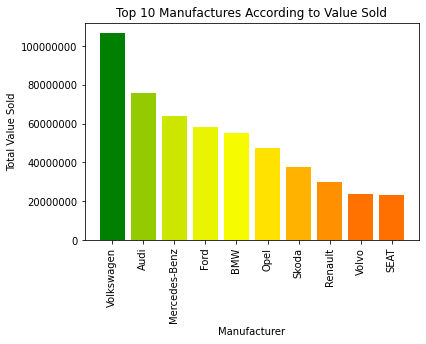

In [ ]:
#Bar Plot for Top 10 Manufactures According to Value Sold
import matplotlib.colors as colors
cmap = colors.LinearSegmentedColormap.from_list("mycmap", ["red", "yellow", "green"])
map = colors.Normalize(vmin = most_value_sold["total_amount"].min(), vmax = most_value_sold["total_amount"].max())
plt.bar(make, total_amount, color = cmap(map(most_value_sold["total_amount"])))
plt.xticks(rotation = 90)
plt.xlabel("Manufacturer")
plt.ylabel("Total Value Sold")
plt.title("Top 10 Manufactures According to Value Sold")
plt.ticklabel_format(style = "plain", axis = "y")


**Volkswagen is the most popular brand in Germany**

In [ ]:
#finding most mileage
cars_mileage = cars_set_clean.groupby(by = "make")["mileage"].sum().to_frame().reset_index().sort_values(by = "mileage", ascending = False)
cars_mileage

,make,mileage
67,Volkswagen,543314327
51,Opel,360653754
26,Ford,294788155
7,BMW,228352758
46,Mercedes-Benz,219733849
...,...,...
4,Alpine,3112
69,Zhidou,3000
1,Aixam,1205
22,Estrima,450


In [ ]:
top_mileage = cars_mileage.head(10)
top_mileage

,make,mileage
67,Volkswagen,543314327
51,Opel,360653754
26,Ford,294788155
7,BMW,228352758
46,Mercedes-Benz,219733849
6,Audi,198562353
61,Skoda,197373355
58,Renault,154065744
60,SEAT,123536150
28,Hyundai,94363394


Text(0.5, 1.0, 'Most driven cars')

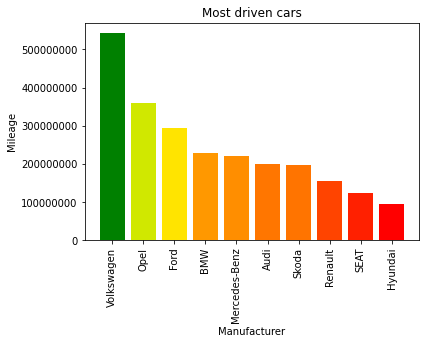

In [ ]:
map = colors.Normalize(vmin = 94363394, vmax = 543314327)
plt.bar(top_mileage["make"], top_mileage["mileage"], color = cmap(map(top_mileage["mileage"])))
plt.xticks(rotation = 90)
plt.ticklabel_format(style = "plain", axis = "y")
plt.xlabel("Manufacturer")
plt.ylabel("Mileage")
plt.title("Most driven cars")

**Most Driven Car is Volkswagen, Audi Being the second most sold in Germany is 6th when mileage is concerned.**

In [ ]:
models = cars_set_clean.groupby(by = "make")["model"].nunique().to_frame().reset_index()
models = models.rename(columns = {"make": "make", "model" : "model_count"})
models.sort_values(by = "model_count", ascending = False)

,make,model_count
46,Mercedes-Benz,124
7,BMW,73
67,Volkswagen,54
41,MINI,38
6,Audi,37
...,...,...
23,FISKER,1
31,Iveco,1
4,Alpine,1
69,Zhidou,1


In [ ]:
#Finding the highest sold Mercedes model
cars_set_clean[cars_set_clean["make"] == "Mercedes-Benz"]["model"].value_counts().nlargest(1)

C 220    150
Name: model, dtype: int64

In [ ]:
#finding the highest model sold
best_model = cars_set_clean["model"].value_counts().nlargest(10).to_frame().reset_index()
best_model = best_model.rename(columns = {"index" : "model", "model" : "units_sold"})
best_model

,model,units_sold
0,Golf,1450
1,Corsa,1393
2,Fiesta,1221
3,Astra,1141
4,Focus,948
5,up!,919
6,Polo,853
7,Fabia,832
8,forTwo,684
9,Octavia,648


In [ ]:
model_group = cars_set_clean.groupby(by = "make")["model"].value_counts().nlargest(10).to_frame().rename(columns = {"model" : "count"}).reset_index()
model_group

,make,model,count
0,Volkswagen,Golf,1450
1,Opel,Corsa,1393
2,Ford,Fiesta,1221
3,Opel,Astra,1141
4,Ford,Focus,948
5,Volkswagen,up!,919
6,Volkswagen,Polo,853
7,Skoda,Fabia,832
8,smart,forTwo,684
9,Skoda,Octavia,648


Text(0.5, 1.0, 'Comparing the top 10 most sold cars')

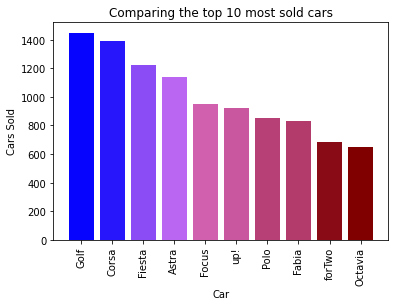

In [ ]:
c1 = colors.LinearSegmentedColormap.from_list("col", ["maroon", "violet", "blue"])
c = colors.Normalize(vmin = 648, vmax = 1460)
plt.bar(model_group["model"], model_group["count"], color = c1(c(model_group["count"])))
plt.xticks(rotation = 90)
plt.xlabel("Car")
plt.ylabel("Cars Sold")
plt.title("Comparing the top 10 most sold cars")

**Golf is the most popular car in Germany**

In [ ]:
golf = cars_set_clean[cars_set_clean["model"] == "Golf"]
golf_year = golf.groupby(by = "year").count().reset_index()
golf_year
corsa = cars_set_clean[cars_set_clean["model"] == "Corsa"].groupby("year").count().reset_index()
corsa
fiesta = cars_set_clean[cars_set_clean["model"] == "Fiesta"].groupby("year").count().reset_index()
fiesta

,year,mileage,make,model,fuel,gear,offerType,price,hp
0,2011,73,73,73,73,73,73,73,73
1,2012,96,96,96,96,96,96,96,96
2,2013,97,97,97,97,97,97,97,97
3,2014,87,87,87,87,87,87,87,87
4,2015,114,114,114,114,114,114,114,114
5,2016,112,112,112,112,112,112,112,112
6,2017,125,125,125,125,125,125,125,125
7,2018,111,111,111,111,111,111,111,111
8,2019,200,200,200,200,200,200,200,200
9,2020,152,152,152,152,152,152,152,152


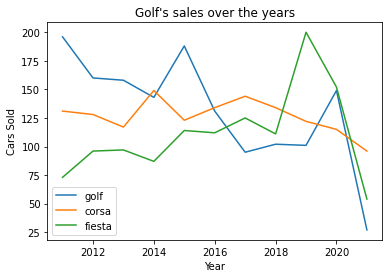

In [ ]:
#plotting the performance in sales for the top 3 models
plt.plot(golf_year["year"], golf_year["gear"].interpolate(method = "spline", order = 3), label = "golf")
plt.plot(corsa["year"], corsa["gear"].interpolate(method = "spline", order = 3), label = "corsa")
plt.plot(fiesta["year"], fiesta["gear"].interpolate(method = "spline", order = 3), label = "fiesta")
plt.xlabel("Year")
plt.ylabel("Cars Sold")
plt.title("Golf's sales over the years")
plt.legend()

**Fiesta has shown an increase in sales gradually but a huge drop in 2021 while corsa and golf have a decreasing slope over the years with positive spikes in some years.**

In [ ]:
pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import plotly.graph_objects as go

In [ ]:
dia = go.Figure()
dia.add_trace(go.Line(x = golf_year["year"], y = golf_year["gear"], name = "Golf", marker = dict(color = "lightgreen")))
dia.add_trace(go.Line(x = corsa["year"], y = corsa["gear"], name = "corsa", marker = dict(color = "orange")))
dia.add_trace(go.Line(x = fiesta["year"], y = fiesta["gear"], name = "Fiesta", marker = dict(color = "lightblue")))
dia.add_trace(go.Bar(x = golf_year["year"], y = golf_year["gear"], name = "Golf", marker = dict(color = "lightgreen")))
dia.add_trace(go.Bar(x = corsa["year"], y = corsa["gear"], name = "corsa"))
dia.add_trace(go.Bar(x = fiesta["year"], y = fiesta["gear"], name = "Fiesta", marker = dict(color = "lightblue")))



dia.update_layout(title = "Comparison Of Most Sold Model By Year", xaxis_title = "Year")

/usr/local/lib/python3.9/dist-packages/plotly/graph_objs/_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns

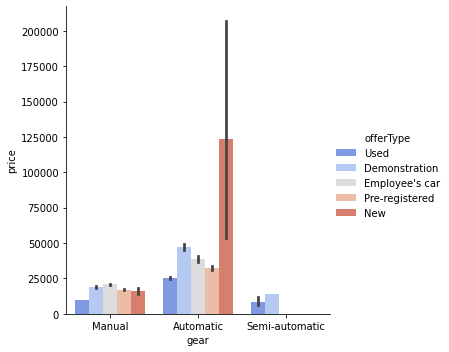

In [ ]:
#comparing gear wise price
sns.catplot(data = cars_set_clean, x = "gear", y = "price", hue = "offerType",kind = "bar", palette = "coolwarm")

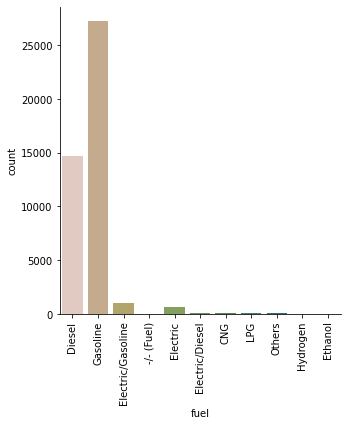

In [ ]:
# cars sold according to car fuel model
palette = sns.color_palette(["red", "green", "blue", "yellow"])
fuel = sns.catplot(data = cars_set_clean, x = "fuel",kind = "count", palette = "gist_earth_r")
fuel.set_xticklabels(rotation = 90)


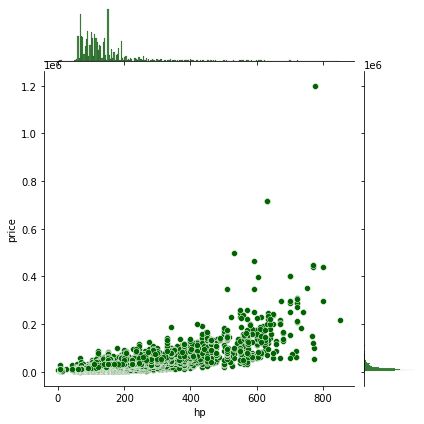

In [ ]:
#price and horsepower
sns.jointplot(data = cars_set_clean, x = "hp", y = "price", color = "darkgreen")

**As horsepower increases price increases**

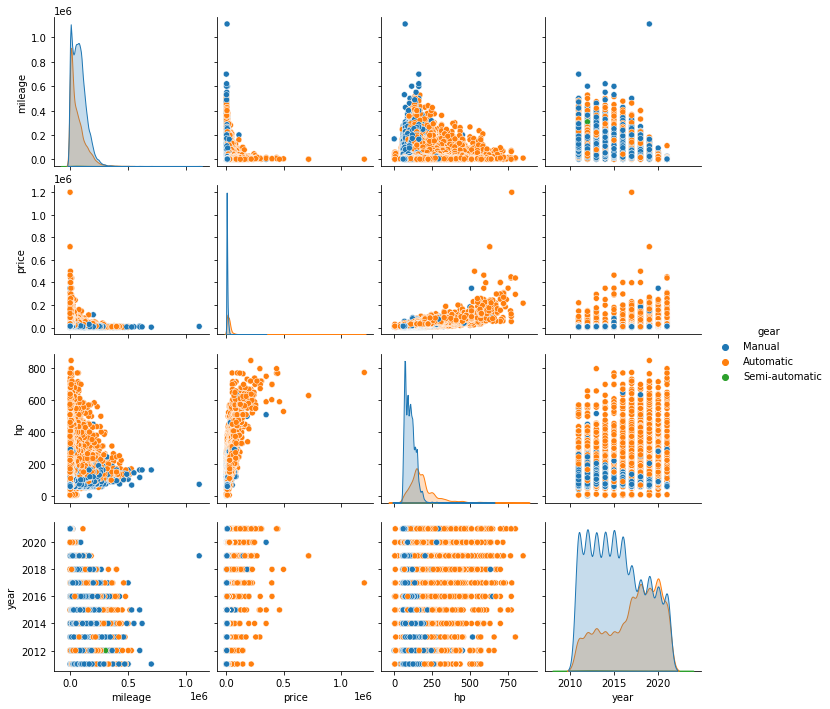

In [ ]:
sns.pairplot(data = cars_set_clean, hue = "gear")